In [20]:
import csv

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [21]:
train = pd.read_csv('train.csv', index_col='id')

train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
id,,,,,,,,,,,,,,,,,,,,,
1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,mon,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
2,50,services,married,high.school,unknown,yes,no,cellular,may,mon,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
5,45,admin.,single,university.degree,no,no,no,cellular,nov,tue,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22496,33,admin.,married,high.school,no,no,no,cellular,aug,fri,...,3,925,3,failure,-2.9,92.47,-43.30,3.36,5203.22,yes
22497,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,fri,...,14,533,3,failure,1.4,93.64,-26.27,4.41,4914.80,no
22498,25,admin.,married,professional.course,no,yes,no,cellular,may,thu,...,0,792,5,success,-1.8,90.43,-36.75,4.05,5114.30,no


In [22]:
test = pd.read_csv('test.csv', index_col='id')

test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
id,,,,,,,,,,,,,,,,,,,,
22501,35,technician,single,professional.course,no,yes,yes,cellular,aug,mon,3295,1,476,0,success,1.4,95.37,-33.04,3.63,5204.54
22502,26,admin.,single,high.school,no,yes,no,cellular,may,thu,2872,1,166,2,success,-1.8,91.75,-44.42,3.16,4924.78
22503,44,blue-collar,married,basic.6y,no,no,no,telephone,may,mon,268,3,968,0,nonexistent,1.1,89.67,-36.90,5.04,4947.02
22504,36,blue-collar,married,basic.9y,no,yes,no,telephone,nov,thu,30,1,432,5,success,-0.1,89.87,-41.66,3.27,5203.33
22505,41,blue-collar,married,basic.4y,no,yes,no,telephone,may,thu,1670,1,944,3,success,1.1,97.64,-36.32,3.95,4992.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,49,admin.,unknown,university.degree,unknown,yes,yes,telephone,apr,fri,3937,50,302,1,failure,-1.8,95.77,-40.50,3.86,5058.64
29997,34,blue-collar,married,basic.4y,no,no,no,cellular,jul,wed,584,8,440,3,failure,1.4,90.59,-47.29,1.77,5156.70
29998,50,retired,single,basic.4y,no,yes,no,cellular,jun,mon,102,3,997,0,nonexistent,-2.9,97.42,-39.69,1.29,5116.80


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 1 to 22500
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               22500 non-null  int64  
 1   job               22500 non-null  object 
 2   marital           22500 non-null  object 
 3   education         22500 non-null  object 
 4   default           22500 non-null  object 
 5   housing           22500 non-null  object 
 6   loan              22500 non-null  object 
 7   contact           22500 non-null  object 
 8   month             22500 non-null  object 
 9   day_of_week       22500 non-null  object 
 10  duration          22500 non-null  int64  
 11  campaign          22500 non-null  int64  
 12  pdays             22500 non-null  int64  
 13  previous          22500 non-null  int64  
 14  poutcome          22500 non-null  object 
 15  emp_var_rate      22500 non-null  float64
 16  cons_price_index  22500 non-null  float6

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 22501 to 30000
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               7500 non-null   int64  
 1   job               7500 non-null   object 
 2   marital           7500 non-null   object 
 3   education         7500 non-null   object 
 4   default           7500 non-null   object 
 5   housing           7500 non-null   object 
 6   loan              7500 non-null   object 
 7   contact           7500 non-null   object 
 8   month             7500 non-null   object 
 9   day_of_week       7500 non-null   object 
 10  duration          7500 non-null   int64  
 11  campaign          7500 non-null   int64  
 12  pdays             7500 non-null   int64  
 13  previous          7500 non-null   int64  
 14  poutcome          7500 non-null   object 
 15  emp_var_rate      7500 non-null   float64
 16  cons_price_index  7500 non-null   flo

In [25]:
numerical_feature = list(test.select_dtypes(exclude='object').columns)
categorical_feature = list(test.select_dtypes(include='object').columns)

numerical_feature, categorical_feature

(['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp_var_rate',
  'cons_price_index',
  'cons_conf_index',
  'lending_rate3m',
  'nr_employed'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'])

In [26]:
for f in categorical_feature:
    print(f'{f} has {train[f].nunique()} unique values')

job has 12 unique values
marital has 4 unique values
education has 8 unique values
default has 3 unique values
housing has 3 unique values
loan has 3 unique values
contact has 2 unique values
month has 10 unique values
day_of_week has 5 unique values
poutcome has 3 unique values


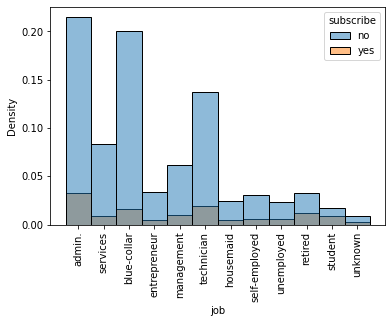

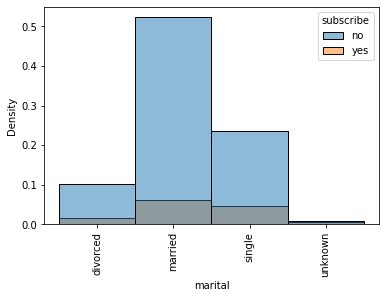

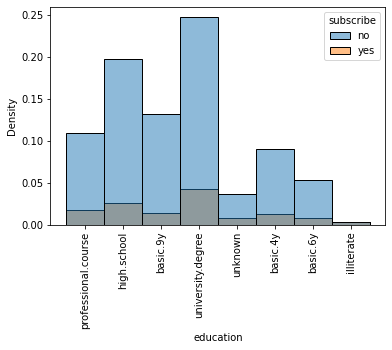

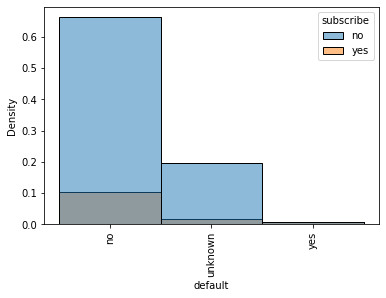

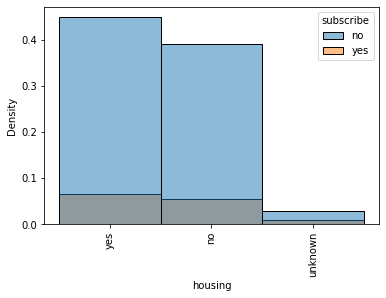

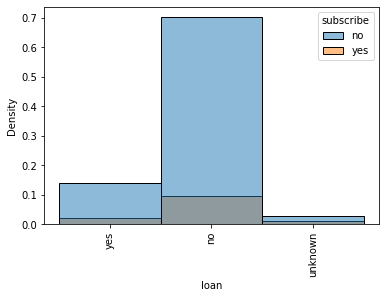

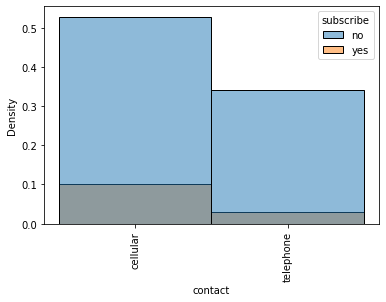

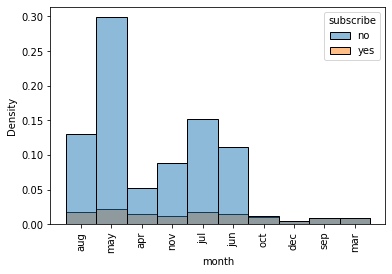

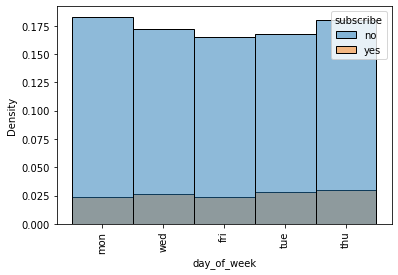

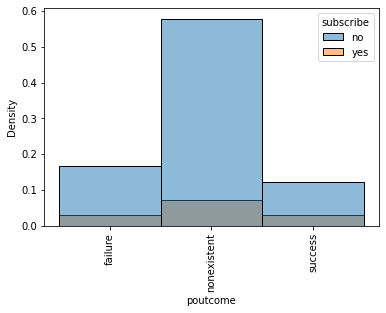

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

for f in categorical_feature:
    sns.histplot(x=f, data=train, hue='subscribe', stat='density')
    plt.xticks(rotation=90)
    plt.show()
    

In [28]:

# sns.pairplot(train.sample(frac=0.01), vars=numerical_feature, hue='subscribe')
# plt.show()

In [29]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['university.degree', 'professional.course', 'high.school', 'basic.9y', 'basic.6y', 'basic.4y', 'illiterate', 'unknown']])
train['education'] = ordinal_encoder.fit_transform(train[['education']])
test['education'] = ordinal_encoder.fit_transform(test[['education']])
categorical_feature.remove('education')


# train.info()

In [30]:
# for f in numerical_feature:
#     sns.boxplot(x=f, data=train)
#     plt.show()

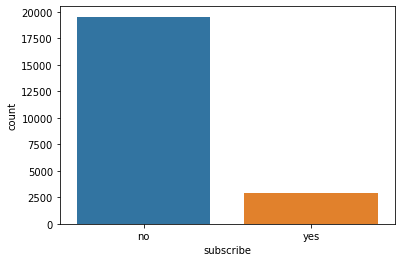

In [31]:
sns.countplot(x='subscribe', data=train)
plt.show()

In [32]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
label_encoder = LabelEncoder()

train['subscribe'] = label_encoder.fit_transform(train['subscribe'])


target = train.pop('subscribe')
target

id
1        0
2        1
3        0
4        1
5        0
        ..
22496    1
22497    0
22498    0
22499    0
22500    1
Name: subscribe, Length: 22500, dtype: int32

In [33]:
for f in categorical_feature:
    train[f] = train[f].astype('category')
    test[f] = test[f].astype('category')
    
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 1 to 22500
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               22500 non-null  int64   
 1   job               22500 non-null  category
 2   marital           22500 non-null  category
 3   education         22500 non-null  float64 
 4   default           22500 non-null  category
 5   housing           22500 non-null  category
 6   loan              22500 non-null  category
 7   contact           22500 non-null  category
 8   month             22500 non-null  category
 9   day_of_week       22500 non-null  category
 10  duration          22500 non-null  int64   
 11  campaign          22500 non-null  int64   
 12  pdays             22500 non-null  int64   
 13  previous          22500 non-null  int64   
 14  poutcome          22500 non-null  category
 15  emp_var_rate      22500 non-null  float64 
 16  cons_price_index  2250

(None, None)

In [34]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[numerical_feature] = scaler.fit_transform(train[numerical_feature])
test[numerical_feature] = scaler.fit_transform(test[numerical_feature])

train, test

(            age           job   marital  education  default  housing     loan  \
 id                                                                              
 1      0.876440        admin.  divorced        1.0       no      yes      yes   
 2      0.793699      services   married        2.0  unknown      yes       no   
 3      0.628215   blue-collar  divorced        3.0       no       no       no   
 4     -1.192102  entrepreneur    single        2.0      yes      yes      yes   
 5      0.379990        admin.    single        0.0       no       no       no   
 ...         ...           ...       ...        ...      ...      ...      ...   
 22496 -0.612910        admin.   married        2.0       no       no       no   
 22497 -0.530168        admin.  divorced        2.0       no  unknown  unknown   
 22498 -1.274843        admin.   married        1.0       no      yes       no   
 22499  1.372890       retired   married        2.0       no      yes       no   
 22500  0.297249

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        'learning_rate': trial.suggest_categorical('learning_rate', [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]),
        'n_estimators': 1000,
        'subsample': trial.suggest_categorical('subsample', [0.7, 0.8, 0.9, 1]),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.7, 0.8, 0.9, 1]),
        # 'reg_alpha': trial.suggest_float('reg_alpha', 0, 100),
        # 'reg_lambda': trial.suggest_float('reg_lambda', 0, 100),
        'metric': 'auc',
        'verbose': -1,
        'random_state': 2024
    }

    cla = LGBMClassifier(**params)
    
    x_train, x_test, y_train, y_test = train_test_split(train, target)
    cla.fit(x_train, y_train, categorical_feature = categorical_feature)
    y_predict = cla.predict(x_test, categorical_feature = categorical_feature, num_iteration=cla.best_iteration_)
      
    return roc_auc_score(y_test, y_predict)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)


[I 2024-11-25 09:50:36,587] A new study created in memory with name: no-name-32100b26-760d-4305-ad3a-82773985ddcd
[I 2024-11-25 09:50:37,759] Trial 0 finished with value: 0.6636422165326625 and parameters: {'learning_rate': 0.01, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best is trial 0 with value: 0.6636422165326625.
[I 2024-11-25 09:50:39,056] Trial 1 finished with value: 0.5 and parameters: {'learning_rate': 0.0001, 'subsample': 1, 'colsample_bytree': 1}. Best is trial 0 with value: 0.6636422165326625.
[I 2024-11-25 09:50:40,129] Trial 2 finished with value: 0.652377601964696 and parameters: {'learning_rate': 0.01, 'subsample': 0.7, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.6636422165326625.
[I 2024-11-25 09:50:41,421] Trial 3 finished with value: 0.5 and parameters: {'learning_rate': 0.0001, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.6636422165326625.
[I 2024-11-25 09:50:42,558] Trial 4 finished with value: 0.5 and parameters: {'learni

In [36]:
best_params = study.best_params
best_params['metric'] = 'auc'
best_params['n_estimators'] = 1000
best_params['random_state'] = 2024

cla = LGBMClassifier(**best_params)


x_train, x_test, y_train, y_test = train_test_split(train, target, random_state=2024)
cla.fit(x_train, y_train, categorical_feature = categorical_feature)

y_predict = cla.predict(x_test, categorical_feature = categorical_feature, num_iteration=cla.best_iteration_)

score = roc_auc_score(y_test, y_predict)
print(f'cla\n{cla.get_params()}')
print(f'cla score:{score}')


cla
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.9, 'importance_type': 'split', 'learning_rate': 0.01, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 2024, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'metric': 'auc'}
cla score:0.6488071378199809


In [37]:
kf = KFold(n_splits = 5, shuffle=True, random_state=2024)
probas = [0] * len(test)
valid_score = 0
for train_index, test_index in kf.split(train):
    x_train, x_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    cla.fit(x_train, y_train, categorical_feature = categorical_feature)
    
    y_predict = cla.predict_proba(test, categorical_feature = categorical_feature, num_iteration=cla.best_iteration_)
    for i in range(len(test)):
        probas[i] += y_predict[i][0]/5

In [38]:
data = {
    'id': test.index,
    'subscribe': [('no' if i > 0.5 else 'yes') for i in probas]
}

submission = pd.DataFrame(data)
submission.to_csv('submission.csv', index=None)
